<a href="https://colab.research.google.com/github/yavin228/data-sales-main/blob/main/Ajio_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

customers = pd.read_csv('customer.csv')
delivery = pd.read_csv('delivery.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
ratings = pd.read_csv('ratings.csv')
returns= pd.read_csv('returns.csv')
transactions = pd.read_csv('transaction.csv')



In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Or_ID       10000 non-null  object
 1   C_ID        10000 non-null  object
 2   P_ID        10000 non-null  object
 3   Order_Date  10000 non-null  object
 4   Order_Time  10000 non-null  object
 5   Qty         10000 non-null  int64 
 6   Coupon      10000 non-null  object
 7   DP_ID       10000 non-null  object
 8   Discount    10000 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 703.3+ KB


In [ ]:
orders.describe()

,Qty,Discount
count,10000.000000,10000.000000
mean,5.513600,9.066700
std,2.882195,11.828941
min,1.000000,0.000000
25%,3.000000,0.000000
50%,6.000000,0.000000
75%,8.000000,15.000000
max,10.000000,50.000000


In [ ]:
transactions.describe()

,Tr_ID,Or_ID,Transaction_Mode,Reward
count,10000,10000,10000,10000
unique,10000,6248,5,2
top,TR_41009984,OR_31004020,Net Banking,No
freq,1,6,2057,5024


In [ ]:
transactions.head()

,Tr_ID,Or_ID,Transaction_Mode,Reward
0,TR_41000001,OR_31002037,Wallet,No
1,TR_41000002,OR_31008376,Wallet,Yes
2,TR_41000003,OR_31002152,UPI,No
3,TR_41000004,OR_31009239,Credit Card,Yes
4,TR_41000005,OR_31002891,Debit Card,No


In [ ]:
# to check for duplictate in your dataframe
orders.duplicated().sum()
transactions.duplicated().sum()
customers.duplicated().sum()
delivery.duplicated().sum()
products.duplicated().sum()
ratings.duplicated().sum()
returns.duplicated().sum()

np.int64(0)

In [ ]:
# drop duplicate value if exist
orders = orders.drop_duplicates()
delivery = delivery.drop_duplicates()
products = products.drop_duplicates()
ratings = ratings.drop_duplicates()
raturns = returns.drop_duplicates()
tarnsactions = transactions.drop_duplicates()

In [ ]:
orders.isnull().sum()

,0
Or_ID,0
C_ID,0
P_ID,0
Order_Date,0
Order_Time,0
Qty,0
Coupon,0
DP_ID,0
Discount,0


In [ ]:
# if we have a null vales we can process like this:
# drops null values(lost of informations)
# fill nuls- (constant, text, mean ,mode,ffill,bfill)
#asuming quantity has null values


orders['Qty'] = orders['Qty'].fillna(orders['Qty'].mean()) #mean() or mode()
orders['Qty'] = orders['Qty'].fillna(orders['Qty'])

In [ ]:
orders.head(2)

,Or_ID,C_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount
0,OR_31000001,CS_11005317,PD_21001301,2024-02-27,22:02:00,1,No Coupon,DV_61000001,0
1,OR_31000002,CS_11000423,PD_21003593,2024-01-21,08:33:31,5,PULL,DV_61000002,25


In [ ]:
customers.head(2)

,C_ID,C_Name,Gender,Age,City,State,Street_Address,Mobile
0,CS_11000001,Manbir Lala,Male,67,Delhi,Delhi,"Park Ave, 163 , Delhi , Delhi - 529675",9607971039
1,CS_11000002,Radhika More,Female,51,Pune,Maharashtra,"Elm St, 960 , Pune , Maharashtra - 328062",9109249091


In [ ]:
# join two tables togother, merge function

merge_cust_ord = pd.merge(customers,orders, on='C_ID',how='inner')
merge_cust_ord

,C_ID,C_Name,Gender,Age,City,State,Street_Address,Mobile,Or_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount
0,CS_11000001,Manbir Lala,Male,67,Delhi,Delhi,"Park Ave, 163 , Delhi , Delhi - 529675",9607971039,OR_31003479,PD_21004131,2024-07-02,08:30:53,5,RECOGNIZE,DV_61000004,5
1,CS_11000003,Faqid Halder,Female,57,Bengaluru,Karnataka,"Maple St, 71 , Bengaluru , Karnataka - 574209",9129509047,OR_31003857,PD_21007098,2023-07-12,03:39:45,5,LIGHT,DV_61000001,20
2,CS_11000003,Faqid Halder,Female,57,Bengaluru,Karnataka,"Maple St, 71 , Bengaluru , Karnataka - 574209",9129509047,OR_31009393,PD_21008915,2024-06-21,05:13:17,5,EYE,DV_61000004,20
3,CS_11000004,Chandresh Dugar,Female,26,Thane,Maharashtra,"2nd St, 557 , Thane , Maharashtra - 329555",9351639395,OR_31006947,PD_21001957,2023-02-20,17:49:29,6,BAG,DV_61000003,12
4,CS_11000005,Logan Soni,Male,24,Ghaziabad,Uttar Pradesh,"Pine St, 758 , Ghaziabad , Uttar Pradesh - 119526",9445754174,OR_31006255,PD_21004307,2024-03-09,20:41:45,7,MINUTE,DV_61000005,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CS_11009997,Ekaraj Kapur,Male,55,Kolkata,West Bengal,"Oak St, 98 , Kolkata , West Bengal - 840791",9306090820,OR_31009217,PD_21003705,2023-01-07,03:38:58,7,MEMORY,DV_61000005,15
9996,CS_11009997,Ekaraj Kapur,Male,55,Kolkata,West Bengal,"Oak St, 98 , Kolkata , West Bengal - 840791",9306090820,OR_31009596,PD_21004141,2023-05-17,20:12:31,7,No Coupon,DV_61000004,0
9997,CS_11009998,Jhalak Raj,Female,26,Ghaziabad,Uttar Pradesh,"Maple St, 231 , Ghaziabad , Uttar Pradesh - 36...",9767929970,OR_31001670,PD_21003285,2023-09-05,21:25:34,5,FAMILY,DV_61000003,25
9998,CS_11009998,Jhalak Raj,Female,26,Ghaziabad,Uttar Pradesh,"Maple St, 231 , Ghaziabad , Uttar Pradesh - 36...",9767929970,OR_31009585,PD_21008229,2024-09-16,19:27:40,4,No Coupon,DV_61000004,0


In [ ]:
#start analyzing
gb = merge_cust_ord.groupby('State').agg({'Or_ID':'count'}) # to count order by state
gb = gb.sort_values('Or_ID',ascending=False) # to filter the result by descending order
gb


,Or_ID
State,
Maharashtra,1994
Gujarat,1551
Uttar Pradesh,1487
Madhya Pradesh,977
Andhra Pradesh,554
Tamil Nadu,541
Telangana,513
Bihar,510
West Bengal,490


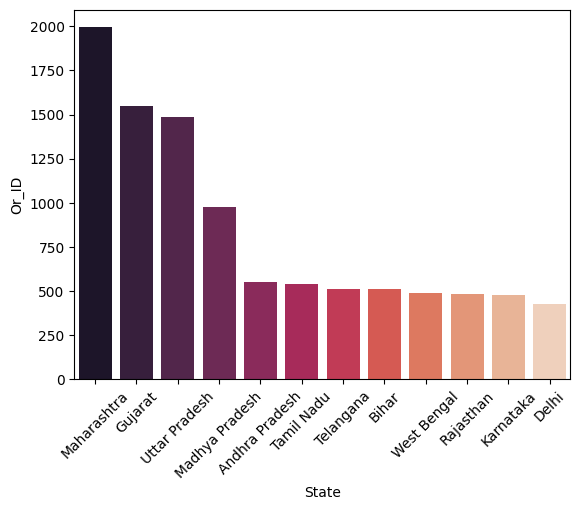

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x = gb.index, y = "Or_ID", data = gb,hue= gb.index ,palette = "rocket")
plt.xticks(rotation= 45)
plt.show()